In [ ]:
!conda install pandas-datareader

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud?resource=download
df = pd.read_csv('data/card_transdata.csv')
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


## data preprocessing and eda
- Perform the data exploration step (i.e. evaluate your data, # of observations, details about your data distributions, scales, missing data, column descriptions) Note: For image data you can still describe your data by the number of classes, # of images, plot example classes of the image, size of images, are sizes uniform? Do they need to be cropped? normalized? etc.

No null data

In [3]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [4]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


Slightly unbalanced fraud class, 8.7% fraud. I will likely use an evaluation metric that punishes false negatives more heavily, so emphasis on recall. The f2 score will likely be used.

In [ ]:
!conda install pandas-datareader

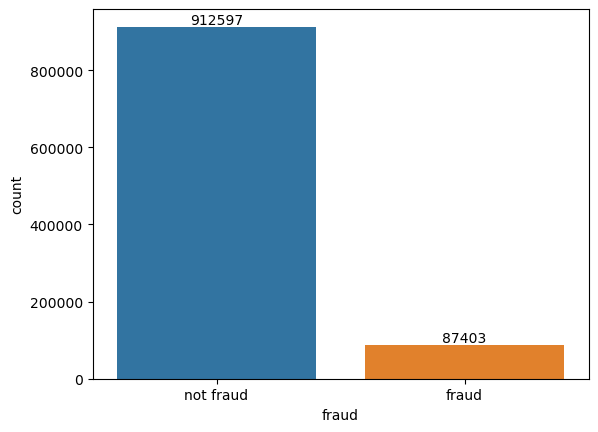

In [36]:
ax = sns.countplot(x='fraud', data=df)
plt.xticks(ticks=[0, 1], labels=['not fraud', 'fraud'])
ax.bar_label(ax.containers[0])
plt.show()

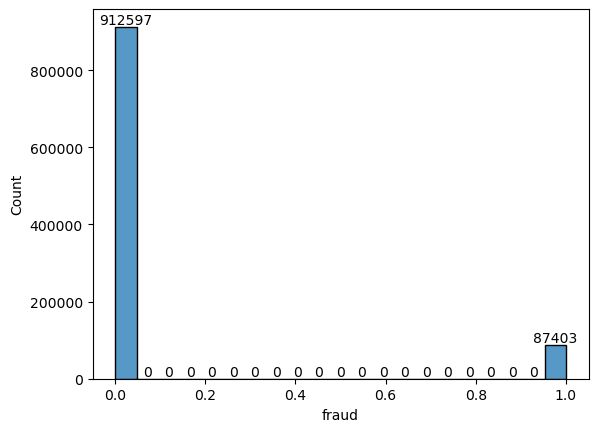

In [26]:
ax = sns.histplot(df['fraud'])
ax.bar_label(ax.containers[0])
plt.show()

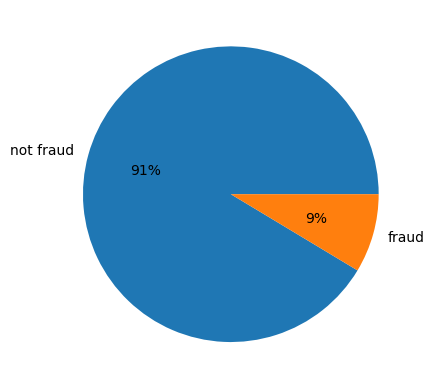

In [37]:
plt.pie(sample['fraud'].value_counts(), labels=['not fraud', 'fraud'], autopct='%.0f%%')
plt.show()

In [38]:
sample = df.sample(10000)

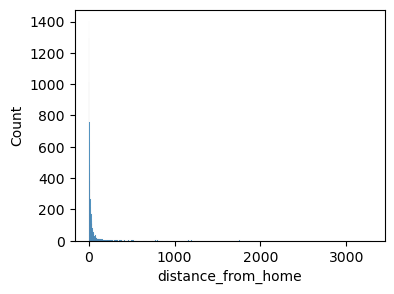

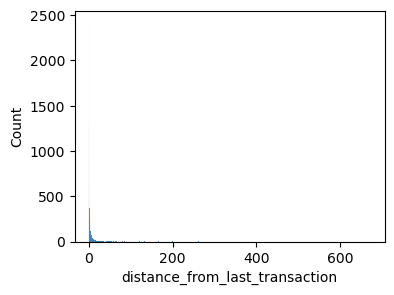

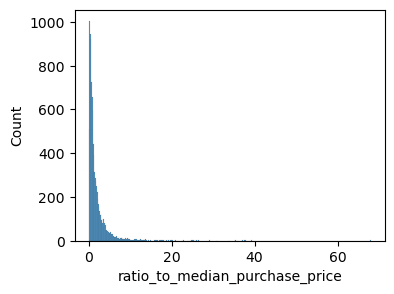

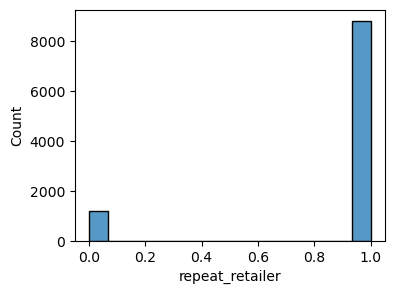

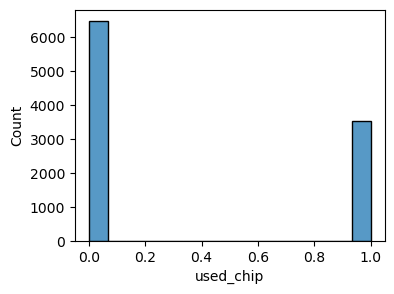

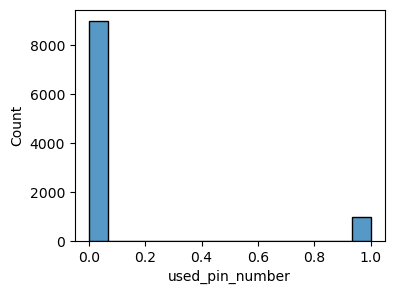

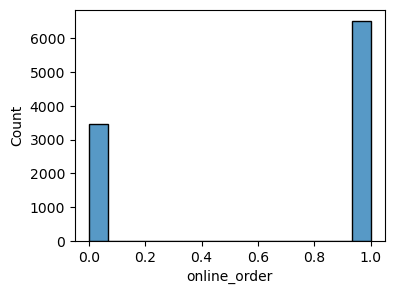

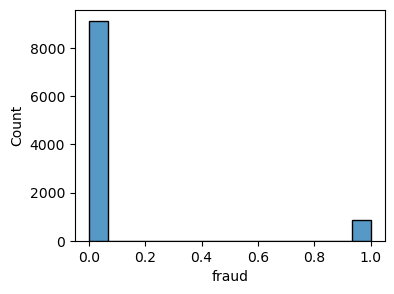

In [45]:
for col in sample.columns:
    plt.figure(figsize=(4, 3))
    sns.histplot(sample[col])
    plt.show()

<AxesSubplot:>

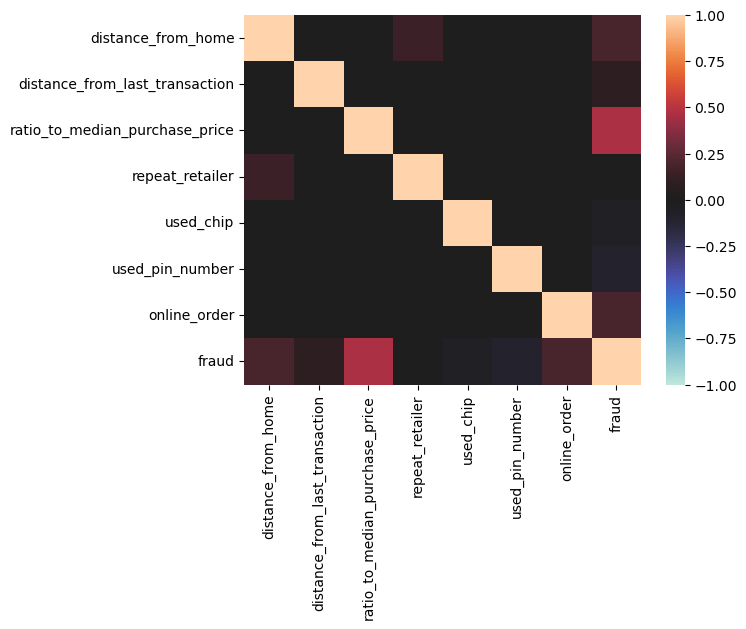

In [40]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0)

I will normalize the data with MinMaxScaler

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.005443,0.000026,0.007250,1.0,1.0,0.0,0.0,0.0
1,0.001018,0.000015,0.004816,1.0,0.0,0.0,0.0,0.0
2,0.000478,0.000068,0.001581,1.0,0.0,0.0,1.0,0.0
3,0.000211,0.000473,0.001338,1.0,1.0,0.0,1.0,0.0
4,0.004156,0.000048,0.008284,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,0.000207,0.000009,0.006058,1.0,1.0,0.0,0.0,0.0
999996,0.001869,0.000226,0.010358,1.0,1.0,0.0,0.0,0.0
999997,0.000274,0.000124,0.000798,1.0,1.0,0.0,1.0,0.0
999998,0.000400,0.000020,0.001760,1.0,0.0,0.0,1.0,0.0


In [55]:
sample = scaled_df.sample(1000)

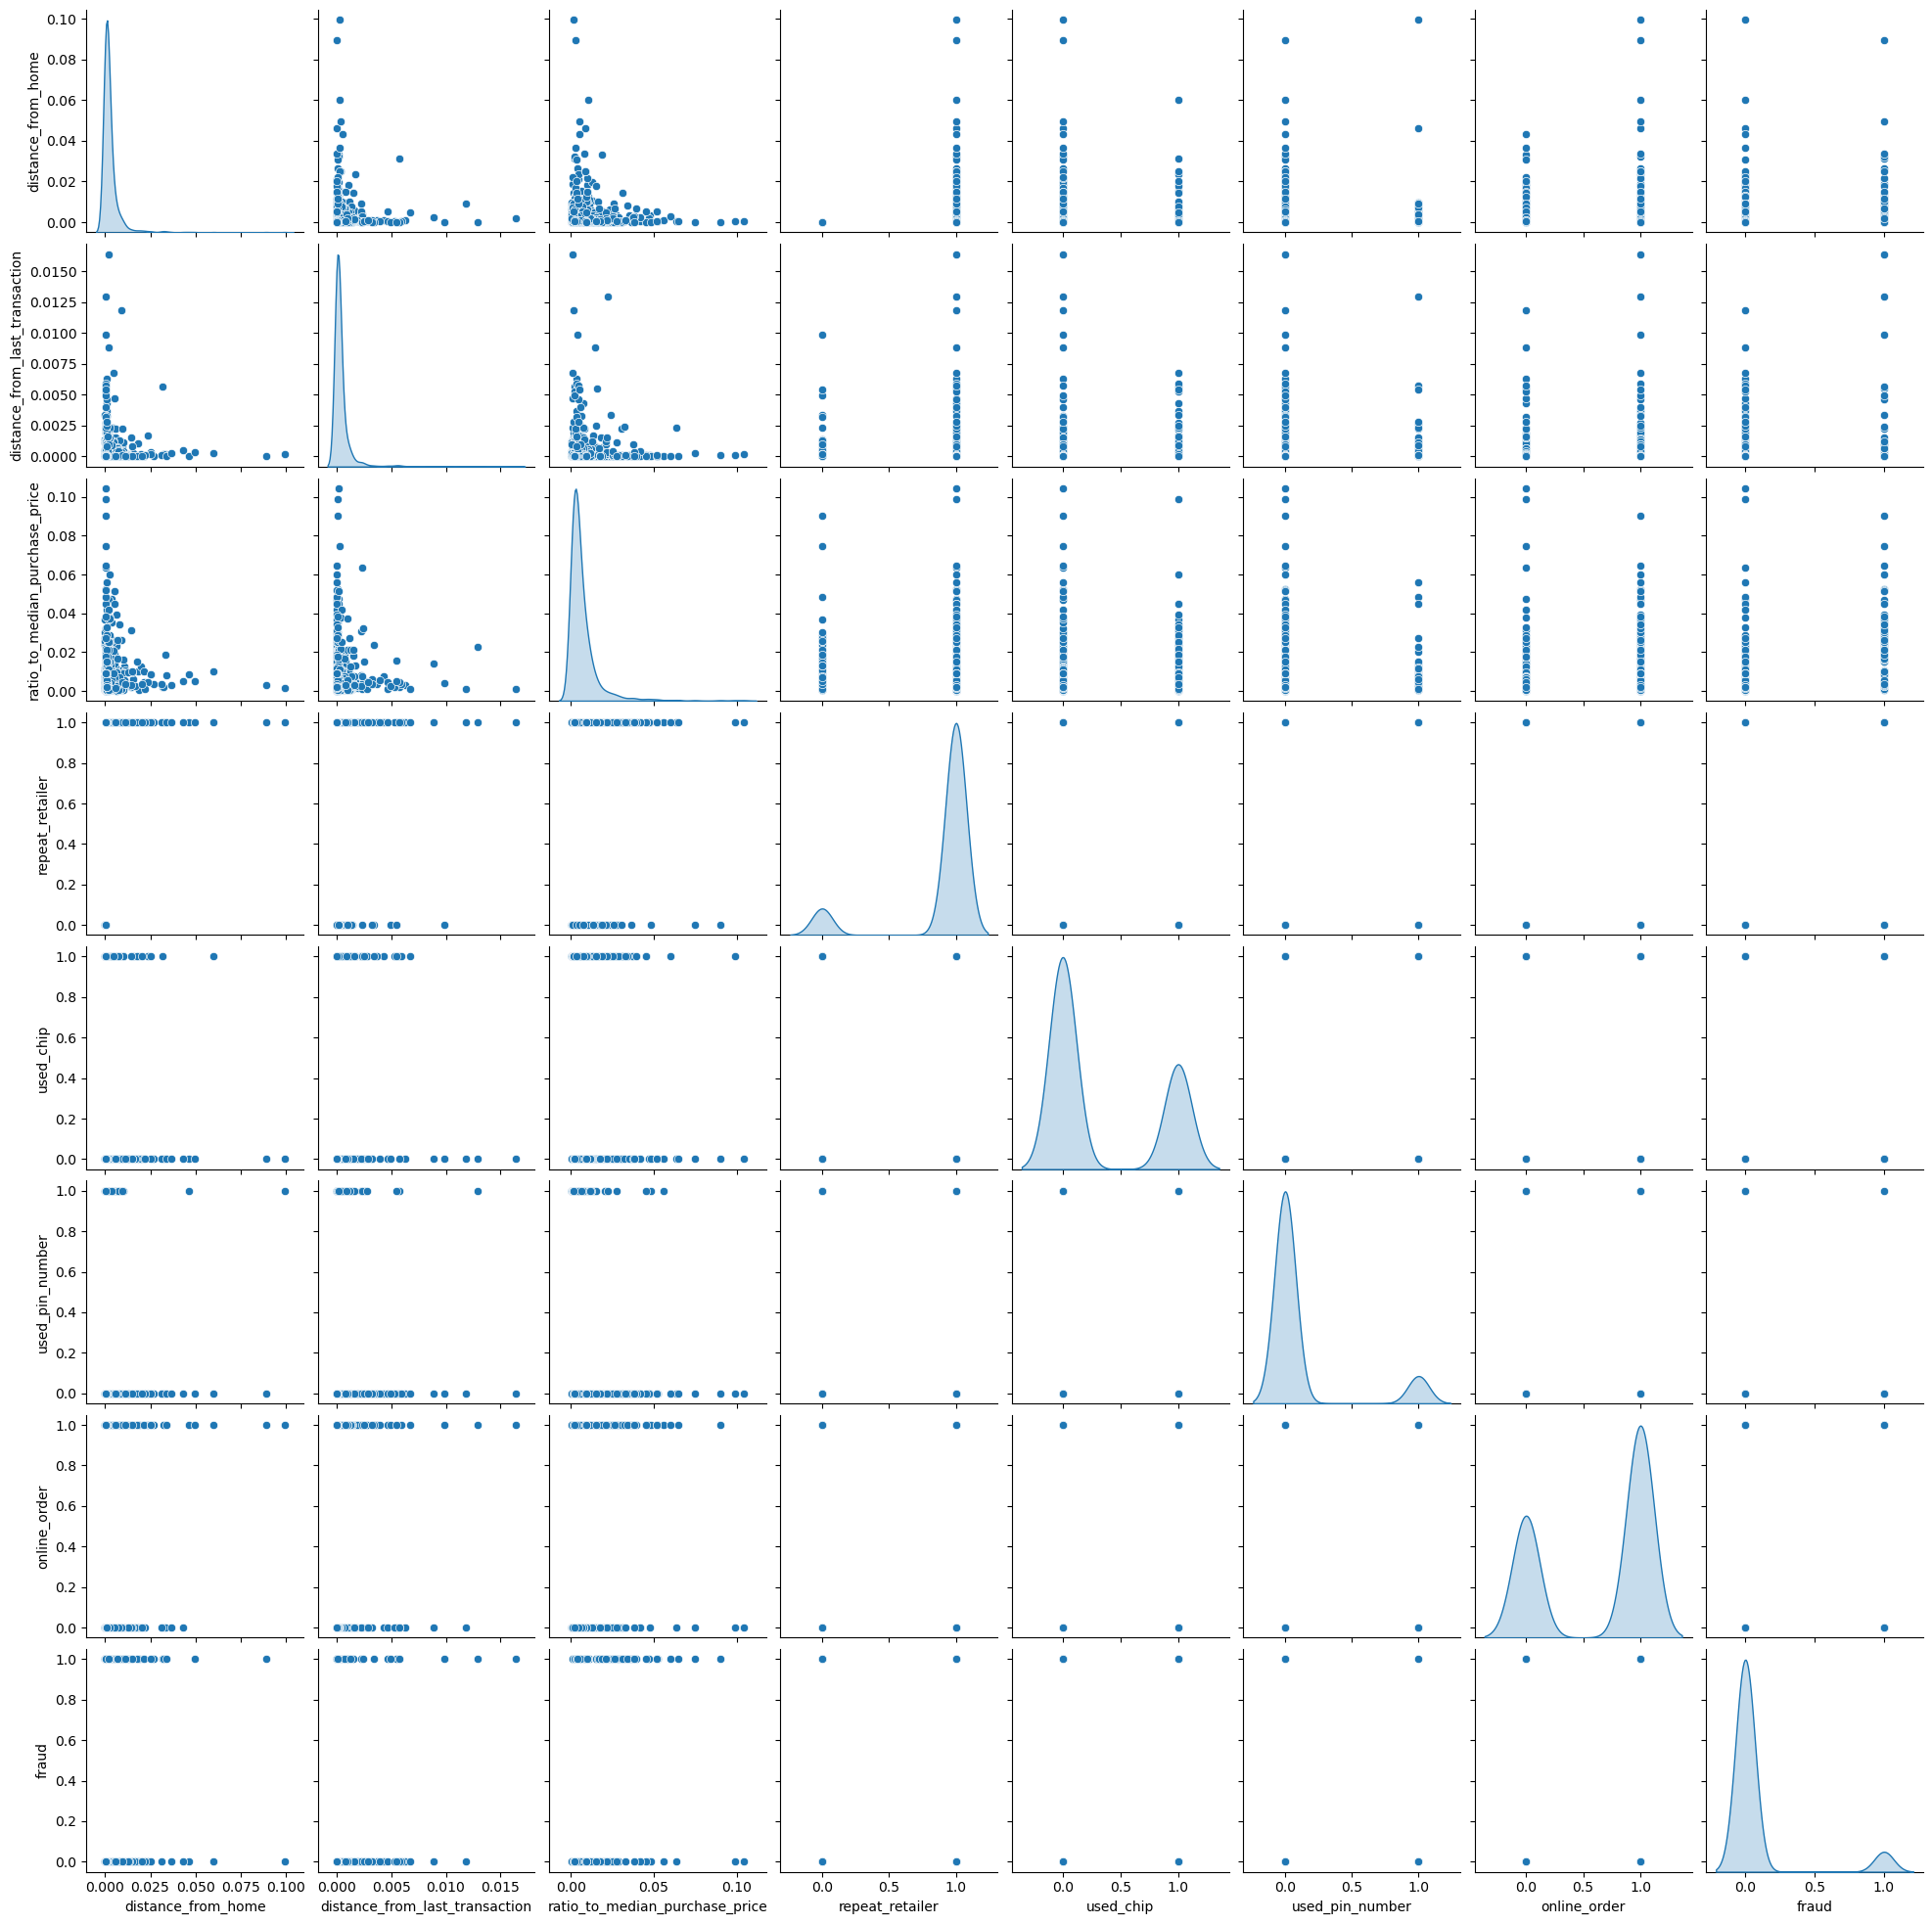

In [56]:
sns.pairplot(sample, diag_kind='kde')

## Splitting Data

Stratified splitting to keep original distribution of the class (fraud column)


In [62]:
X = scaled_df.drop('fraud', axis=1)
y = scaled_df['fraud']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

661471    0.0
75275     0.0
386916    0.0
854266    0.0
2376      0.0
         ... 
806884    0.0
62473     0.0
661343    1.0
467315    0.0
911151    0.0
Name: fraud, Length: 700000, dtype: float64